In [1]:
import h5py
import numpy as np
import tensorflow
import matplotlib.pyplot as plt

2023-06-29 10:15:26.235307: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
!ls

06_29_23_rootFileAnalysis.ipynb  missedSignalPartsDatapT30.h5
allFiles.root			 ParticleTypespT30.h5
dataForgeEvent.py		 sampleDatapT30.h5
dataForgeHH4b.py		 signalPartsDatapT30.h5
dataForge.py			 testingDatapT30.h5
jetDatapT30.h5			 trainingDatapT30.h5


## Jet Data

The next two arrays from the .h5 files will have (pT, Eta, Phi, Mass, label) in that order.

In [11]:
with h5py.File("jetDatapT30.h5", "r") as hf:
    jetDataTesSample = hf["Jet Data"][:]

In [12]:
jetDataTesSample.shape

(4952, 5)

In [13]:
with h5py.File("sampleDatapT30.h5", "r") as hf:
    jetDataTrainSample = hf["Sample Data"][:] 

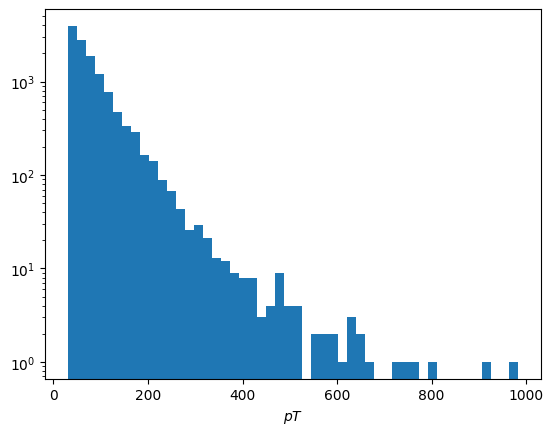

In [97]:
plt.hist(np.concatenate((jetDataTesSample, jetDataTrainSample ))[0:, 0], bins=50)
plt.xlabel("$pT$")
plt.yscale("log")

Text(0.5, 0, '$\\eta$')

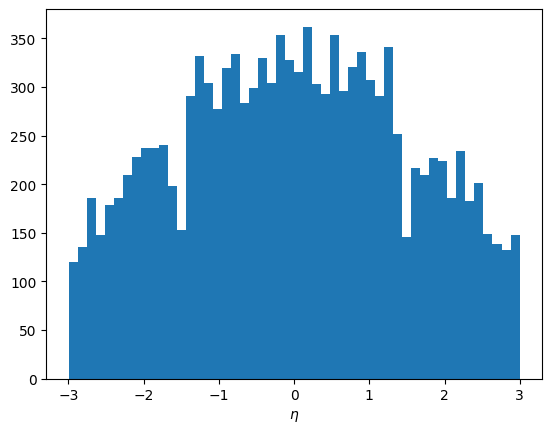

In [49]:
plt.hist(np.concatenate((jetDataTesSample, jetDataTrainSample ))[0:, 1], bins=50)
plt.xlabel("$\eta$")

Text(0.5, 0, '$\\phi$')

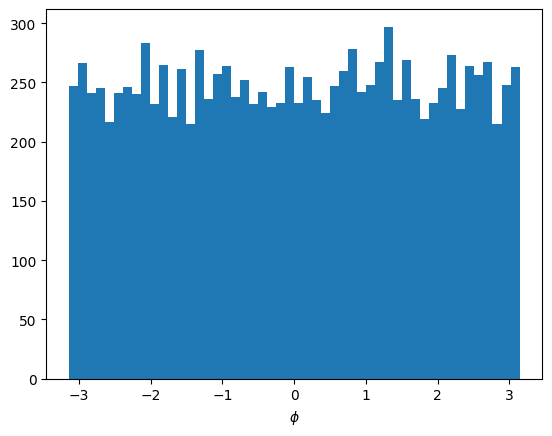

In [50]:
plt.hist(np.concatenate((jetDataTesSample, jetDataTrainSample ))[0:, 2], bins=50)
plt.xlabel("$\phi$")

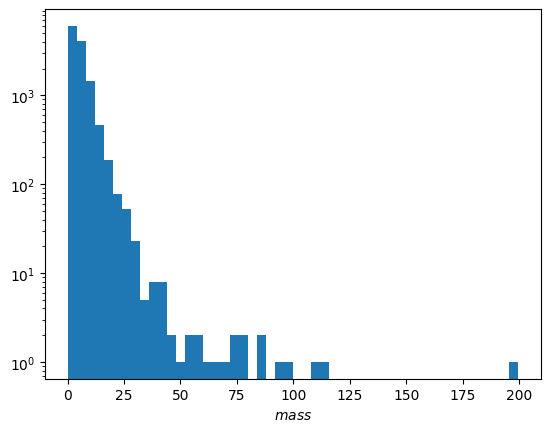

In [98]:
plt.hist(np.concatenate((jetDataTesSample, jetDataTrainSample ))[0:, 3], bins=50)
plt.xlabel("$mass$")
plt.yscale("log")

## Particle Types

In [59]:
import pandas as pd

In [17]:
with h5py.File("ParticleTypespT30.h5", "r") as hf:
    pdgIDs = hf["pdgID"][:]

In [60]:
parts = pd.Series(pdgIDs)

Text(0.5, 0, 'counts')

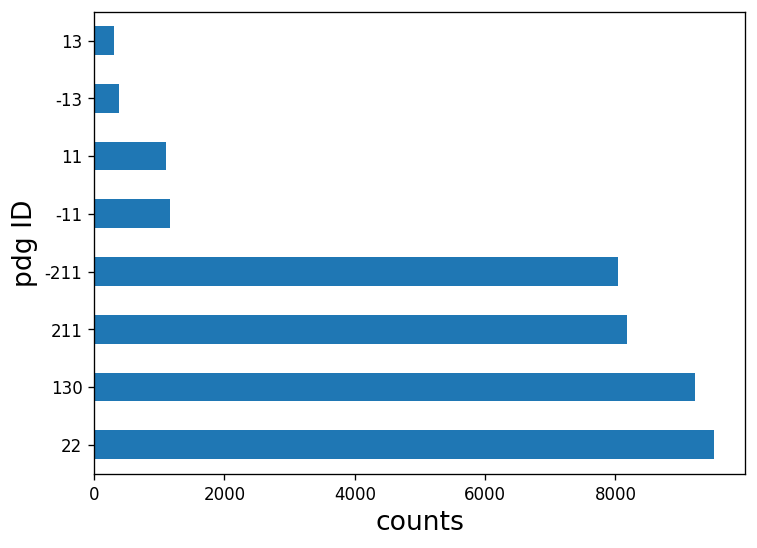

In [61]:
plt.figure(figsize=(7,5), dpi=120)
parts.value_counts().plot(kind="barh")
plt.ylabel("pdg ID", fontsize=16)
plt.xlabel("counts", fontsize=16)

In [63]:
import ROOT as r

Welcome to JupyROOT 6.26/08


In [64]:
inFile = r.TFile.Open("allFiles.root", "READ")

In [65]:
inFile.cd()
inFile.ls()

TFile**		allFiles.root	
 TFile*		allFiles.root	
  KEY: TDirectoryFile	ntuple0;1	ntuple0


In [66]:
tree = inFile.Get("ntuple0/objects")

In [71]:
tree.Show(0)

======> EVENT:0
 emcalo          = (vector<pair<TLorentzVector,int> >*)0x55561d1face0
 egcalo          = (vector<pair<TLorentzVector,int> >*)0x55561d1d4190
 calo            = (vector<pair<TLorentzVector,int> >*)0x55561d1cb030
 pf              = (vector<pair<TLorentzVector,int> >*)0x55561be2a3d0
 pup             = (vector<pair<TLorentzVector,int> >*)0x55561d200510
 gen             = (vector<pair<TLorentzVector,int> >*)0x55561d237fe0
 l1jet           = (vector<pair<TLorentzVector,int> >*)0x55561d2a3520
 recojet         = (vector<pair<TLorentzVector,int> >*)0x55561d412920
 pf_vx           = (vector<float>*)0x55561d1b3250
 pf_vy           = (vector<float>*)0x55561d1d1d60
 pf_vz           = (vector<float>*)0x55561c80ccc0
 pup_vx          = (vector<float>*)0x55561d1b93d0
 pup_vy          = (vector<float>*)0x55561d1ca4e0
 pup_vz          = (vector<float>*)0x55561d3dc780
 vz              = (vector<float>*)0x55561cfe20c0


In [93]:
events = tree.GetEntries()
print(events)

9040


In [88]:
genParts = []
for entryNum in range(events):
    tree.GetEntry(entryNum)
    obj = tree.gen
    for i in range(len(obj)):
        genParts.append(obj[i][1])

In [89]:
genPs = pd.Series(genParts) 

Text(0.5, 0, 'counts')

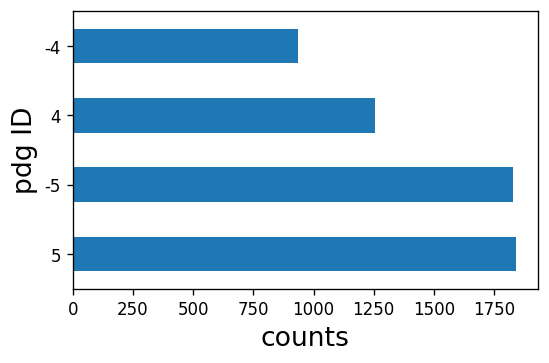

In [112]:
plt.figure(figsize=(5,3), dpi=120)
genPs.value_counts().plot(kind="barh")
plt.ylabel("pdg ID", fontsize=16)
plt.xlabel("counts", fontsize=16)

In [99]:
pfParts = []
for entryNum in range(events):
    tree.GetEntry(entryNum)
    obj = tree.pf
    for i in range(len(obj)):
        pfParts.append(obj[i][1])

In [100]:
pfPs = pd.Series(pfParts)

Text(0.5, 0, 'counts')

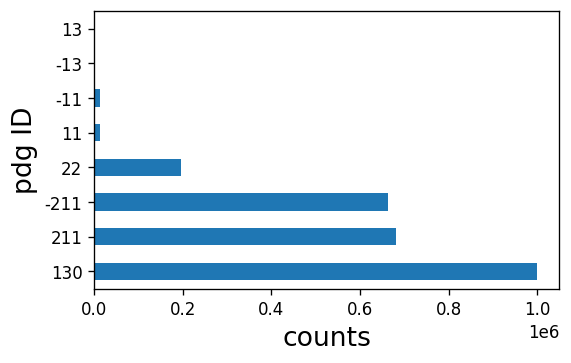

In [111]:
plt.figure(figsize=(5,3), dpi=120)
pfPs.value_counts().plot(kind="barh")
plt.ylabel("pdg ID", fontsize=16)
plt.xlabel("counts", fontsize=16)
#plt.xscale("log")

In [108]:
pfPs.value_counts()

 130    999500
 211    680577
-211    664089
 22     196353
 11      14476
-11      12873
-13       2210
 13       2189
dtype: int64